# Classification Approch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)


## Work flow
0. [x] Clean and Engeering Data for X and y
1. [x] Split Data in Train/Test for X and y
2. [x] Scaler on Training X & X test
3. [x] Create Model(s)
4. [x] Fit/Train Model(s) on X Train
5. [x] Evaluate Model(s) on X test
6. [x] Adjust Param as Necessary
7. [x] Bonus: Save Model(s)

### PreProcess


In [2]:
coloumns = ['Buying','Maint','Doors','Persons','Lug_boot','Safety','Class']

In [3]:
df = pd.read_csv('../car.data',names=coloumns)
df

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### Clean and Engeering Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   Doors     1728 non-null   object
 3   Persons   1728 non-null   object
 4   Lug_boot  1728 non-null   object
 5   Safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df['Buying'].value_counts()

Buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [6]:
df['Class'].value_counts()

Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [7]:
df['Doors'].value_counts()

Doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [8]:
df['Lug_boot'].value_counts()

Lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

In [9]:
df['Maint'].value_counts()

Maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [10]:
df['Persons'].value_counts()

Persons
2       576
4       576
more    576
Name: count, dtype: int64

In [11]:
df['Safety'].value_counts()

Safety
low     576
med     576
high    576
Name: count, dtype: int64

######  categorical to int ny Ordinal Encoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
ordEnc = OrdinalEncoder()
ordEnc.fit(df)

OrdinalEncoder()

In [14]:
ordEnc.categories_

[array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['big', 'med', 'small'], dtype=object),
 array(['high', 'low', 'med'], dtype=object),
 array(['acc', 'good', 'unacc', 'vgood'], dtype=object)]

In [15]:
dfx = ordEnc.transform(df)

In [16]:
dfx = pd.DataFrame(data=np.int_(dfx),columns=coloumns)

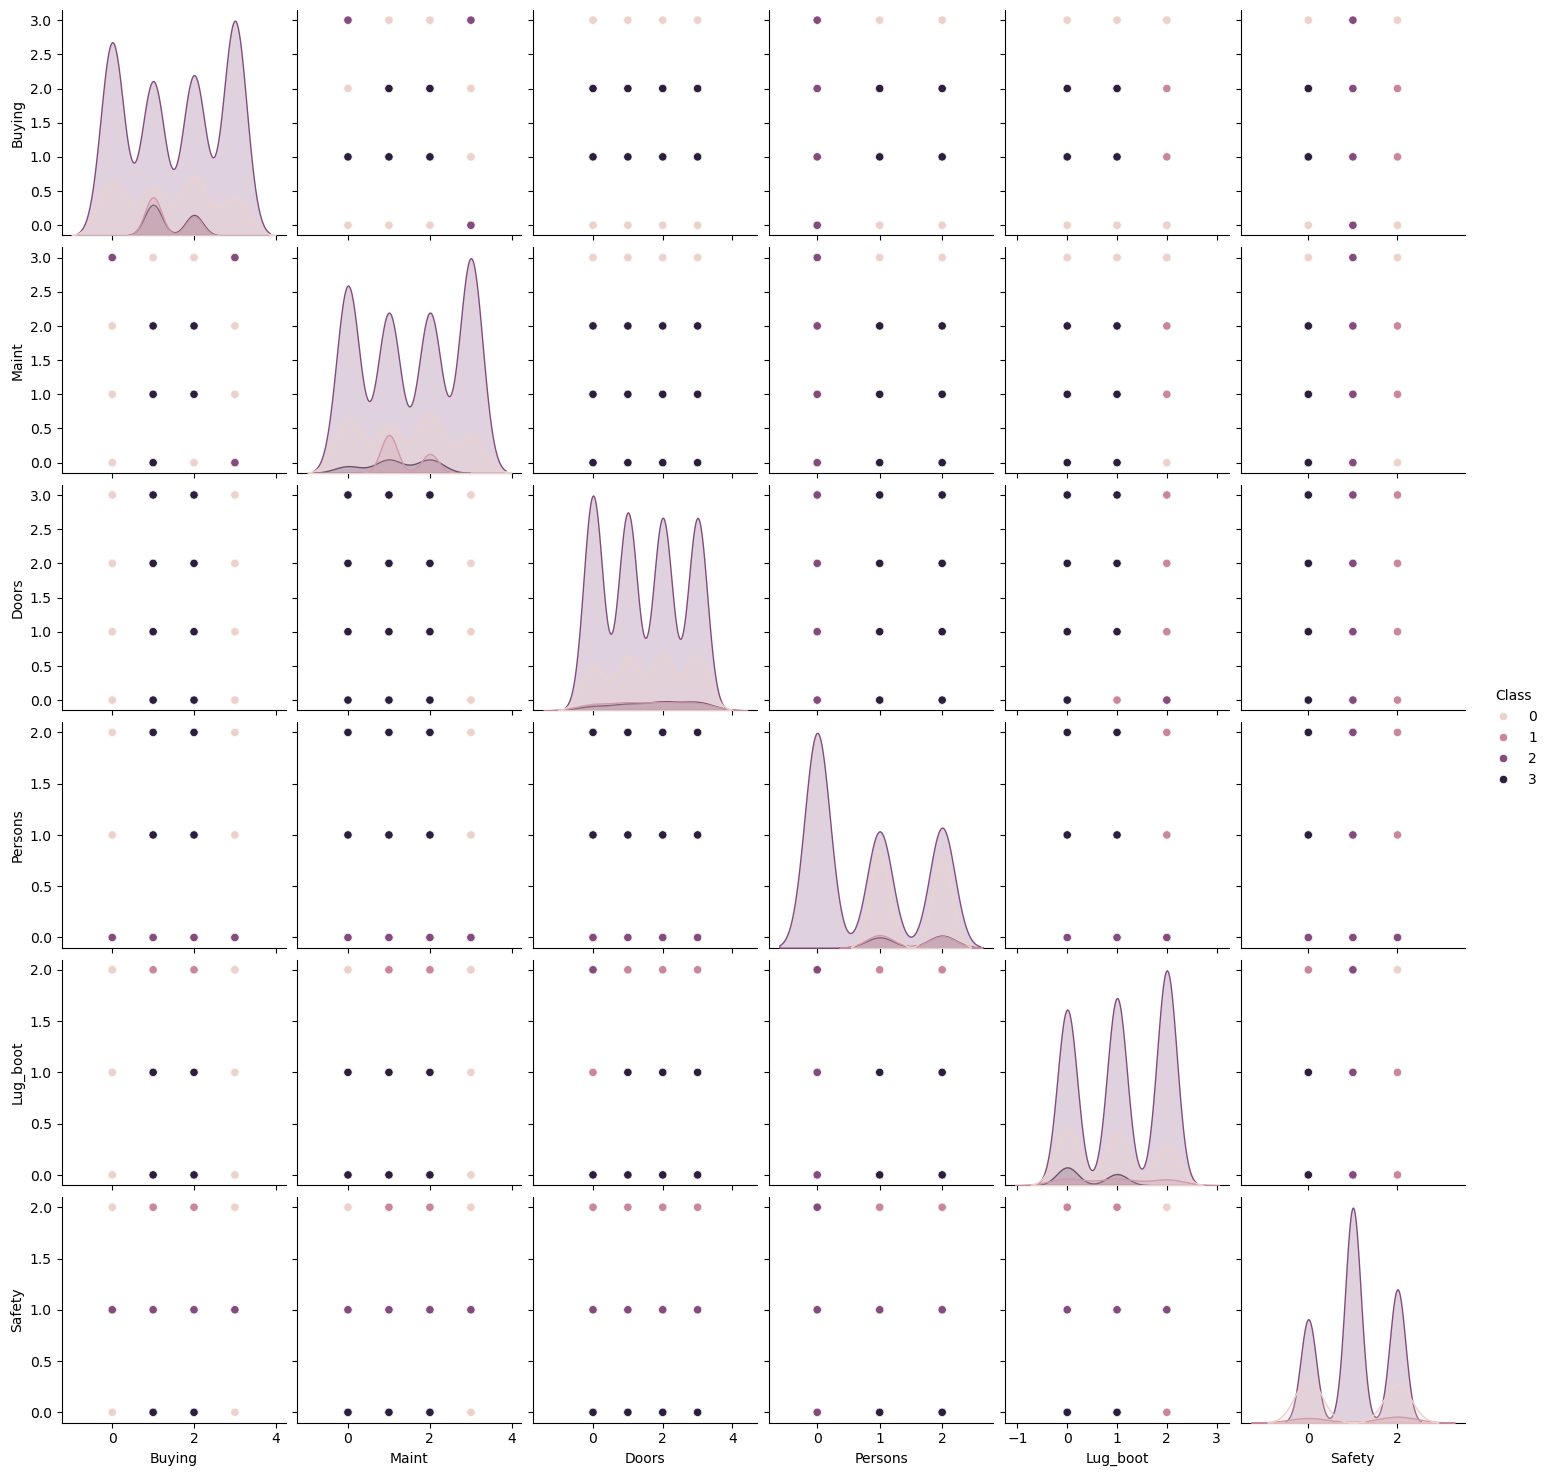

In [17]:
sns.pairplot(data=dfx,hue='Class')

<Axes: >

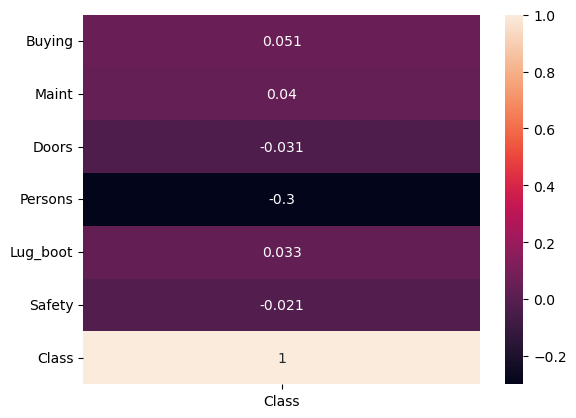

In [18]:
sns.heatmap(dfx.corr()[['Class']],annot=True)

#### Split Data in Train/Test for X and y


In [19]:
X = dfx.drop(['Class'],axis=1)
y = dfx['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1099,stratify=y)

# polynoma

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly =PolynomialFeatures(degree=3,include_bias=False)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [22]:
poly_X_train.shape

(1157, 83)

#### Scaler


In [23]:
#فقط چون که مقیاس ها یکسان نیست(مثلا buying 4 و person 3 ) دارد باید scale  کنیم
scale = StandardScaler()
scale_X_train = scale.fit_transform(poly_X_train)
scale_X_test = scale.transform(poly_X_test)

### Model

In [24]:
help(LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model._logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.BaseEstimator)
 |  LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)
 |  
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  Elastic-Net penalty is only supported by the saga solver.
 |  
 

#### Create Model(s)

In [31]:
model = LogisticRegressionCV(Cs=np.logspace(-4,4,20),
                             cv=5,
                             scoring='f1_macro'
                             ,penalty='l2'
                             ,solver='saga',
                             multi_class='multinomial',
                             random_state=1099,
                             max_iter=1500,
                             class_weight='balanced'
                            )

#### Train Model

In [32]:
model.fit(X=scale_X_train,y=y_train)

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     class_weight='balanced', cv=5, max_iter=1500,
                     multi_class='multinomial', random_state=1099,
                     scoring='f1_macro', solver='saga')

### Evaluate model

#### Test On data

In [33]:
y_pred =model.predict(scale_X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       127
           1       0.82      1.00      0.90        23
           2       1.00      0.97      0.99       400
           3       1.00      0.90      0.95        21

    accuracy                           0.97       571
   macro avg       0.94      0.97      0.95       571
weighted avg       0.98      0.97      0.97       571



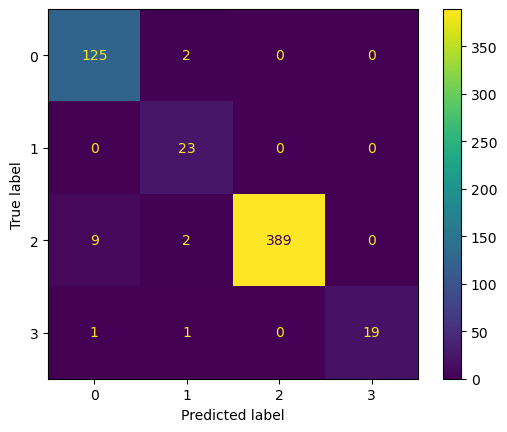

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred),display_labels=model.classes_).plot()

### Final Model(s)


### Final Model(s)


#### Train on all Data 
##### No need!


#### Save with joblib

In [45]:
import joblib
joblib.dump(model,'poly_d3.pkl')

['poly_d3.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
